# software ecosystem ?

In [1240]:
import numpy as np
import pylab as pl
import time
import matplotlib
import life
from importlib import reload

99248.0
1.0
0 50 30 1.0 0 (28, 22)
50 32 30 1.4683696013597407 28 (15, 17)
100 30 30 0.9204350125333264 18 (15, 15)
150 31 30 1.0982046030134271 22 (14, 17)
200 29 30 1.2127980347300464 39 (12, 17)
250 34 30 1.4074626605085618 43 (12, 22)
300 24 31 0.9519763702122971 23 (17, 7)
350 28 31 0.9527976144012114 27 (11, 17)
400 33 31 1.6039200138842333 31 (16, 17)
450 28 31 1.0428133042483847 30 (14, 14)
500 29 31 0.9748968871538785 24 (14, 15)
550 29 32 1.0425343211706102 29 (15, 14)
600 40 32 2.150726260998343 35 (15, 25)
650 23 32 1.1139282448679426 42 (11, 12)
700 29 32 1.0462667190399533 29 (14, 15)
750 29 32 1.056213931203797 28 (14, 15)
800 28 34 1.007622394978948 20 (9, 19)
850 26 34 1.155003995376694 46 (11, 15)
900 30 34 1.1381999463470394 44 (15, 15)
950 36 34 1.233769230850203 34 (11, 25)
93660.66031747047
4.272632081665329


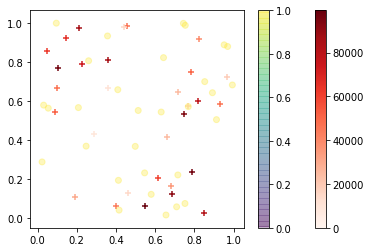

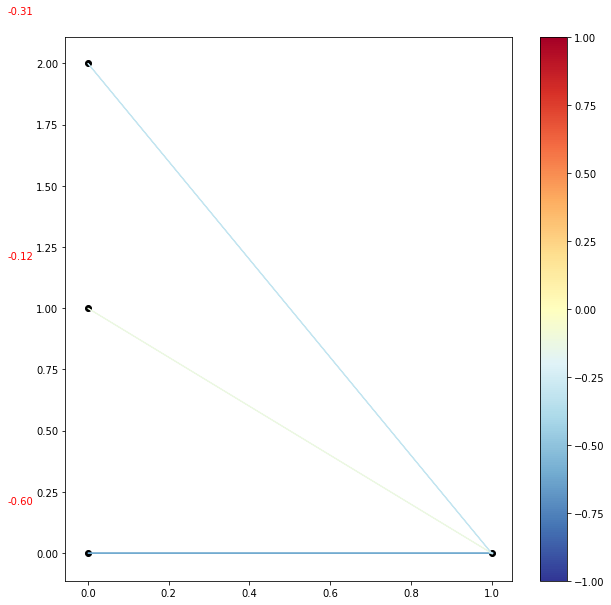

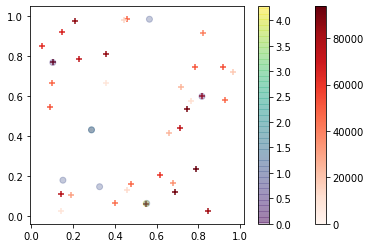

In [1519]:
reload(life)
u = life.Universe(30, 30, regenerate_ratios=(0.1, 0.0002))
u.show()
u.cells[0].brain.show()

#print(sakldj)
old_babies_nb = 0
for itime in range(1000):
    u.generate(20, 0)
    if not itime%50: 
        print(itime, len(u.cells), len(u.foods), u.get_mean_energy(), u.babies_nb - old_babies_nb, u.get_regime())
        old_babies_nb = u.babies_nb
    if len(u.cells) <= 3: break
    u.step()
u.show()

best_cell = u.get_best_cell()

In [1518]:
# herbivore = /, -1
# carnivore = /, 1
# animal = -1, /
# plante = 1, /
print(best_cell.energy)
#print(u.cells[42].all_targets)
for i in np.arange(len(u.cells)):
    icell = u.cells[i]
    all_targets = np.array(icell.all_targets)
    if icell.adn.adn[1] > 0: print('carnivore-------------------')
    print(i, '{:.1f}'.format(icell.energy), icell.adn.adn, np.mean(all_targets[all_targets != 0.]), all_targets[all_targets != 0.].size, all_targets.size, len(icell.all_babies))
    

32.15420105038961
0 3.4 [ 0.46441126 -0.13995242] -1.0 4 4 0
carnivore-------------------
1 3.2 [0.96088215 0.24279517] 1.0 4 4 0
2 13.6 [-0.40106597 -0.33726196] -1.0 4 4 0
3 3.1 [ 0.307513   -0.23972589] -1.0 4 4 1
4 8.6 [-0.23515986 -0.41479781] -1.0 3 3 0
carnivore-------------------
5 9.1 [-0.57178299  0.24479756] 1.0 3 3 0
6 7.2 [-0.91396873 -0.40807892] -1.0 3 3 0
7 2.1 [-0.56635799 -0.17958254] -1.0 3 3 0
8 32.2 [ 0.72543376 -1.        ] -1.0 2 2 0
9 0.4 [-0.77412436 -0.367137  ] -1.0 2 2 1
10 0.8 [-0.90590929 -0.27908855] -1.0 2 2 0
11 9.1 [-0.71651552 -0.5326562 ] -1.0 2 2 0
12 1.0 [ 0.37172309 -0.08885281] -1.0 2 2 0
carnivore-------------------
13 7.2 [0.08373284 0.12455659] 1.0 2 2 0
14 2.9 [ 0.93322688 -0.76671413] -1.0 2 2 0
15 8.0 [-0.86240123 -0.4545838 ] -1.0 2 2 0
carnivore-------------------
16 19.1 [-0.05789065  0.96776165] 1.0 2 2 1
carnivore-------------------
17 0.7 [0.95339943 0.11232755] -1.0 1 1 0
carnivore-------------------
18 0.7 [0.85531199 0.80787524] 1.

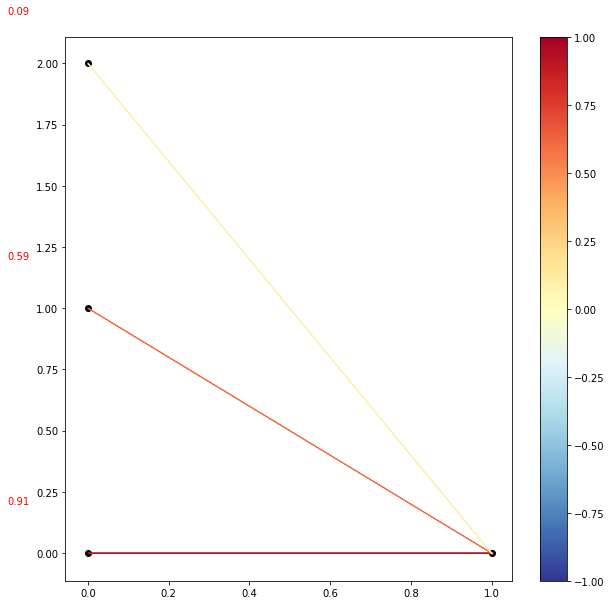

In [1510]:
u.cells[9].brain.show()

[0.09419175559863083, 0.42891870346190014]
0.9315624008894829


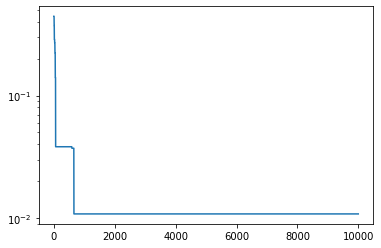

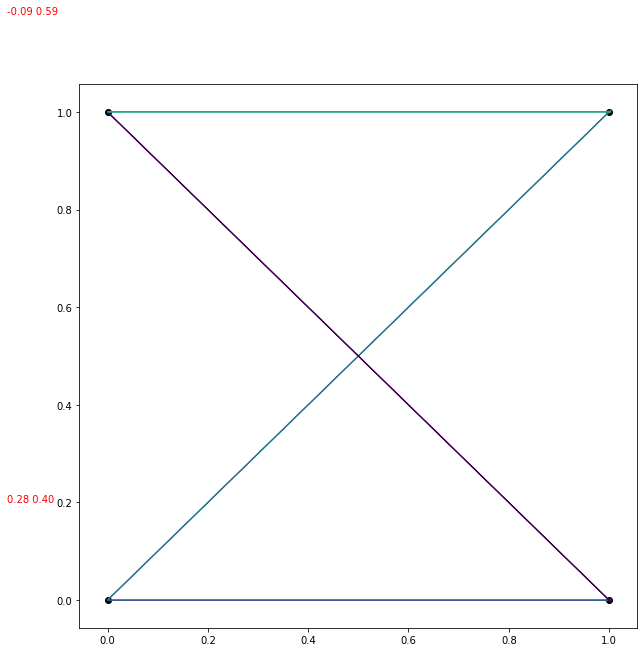

In [648]:
def cost(_in, _out):
    return np.sqrt(np.sum((_in - _out)**2))

_in = np.array([1,0])
#_in = np.random.uniform(size=2)
brain = Brain()
icost = cost(_in, brain.think(_in))
costs = list()
brain.randomize(0.01)

for i in range(10000):
    _in = np.random.uniform(size=2)
    
    icost2 = cost(_in, brain.think(_in))
    
    if icost2 < icost: 
        brain.reapply_gradient()
        icost = icost2
    else:
        brain.invert_gradient()
        brain.randomize(0.01)
        
    costs.append(icost)

print(brain.think(_in))
print(cost(_in, brain.think(_in)))
pl.plot(costs)
pl.yscale('log')
brain.show()